In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib
#Customize background and pallete colors 
sns.set_style("darkgrid")
#ncol = len(phy_norm.T.columns)
from matplotlib import cm
ncol=21
values = np.linspace(0,1, ncol)
#colors_ = cm.Paired(values)
colors_=cm.tab20(values)

# 1. Generate the metabolic profile 

The coding regions were searched from the obtained contigs using [Prodigal v2.6.3](https://github.com/hyattpd/prodigal/wiki/Gene-Prediction-Modes)using  the -a option, to obtain the translated amino acid sequences of the predicted coding regions and -p meta option. The FASTA files of the resulting sequence contigs have been deposited in the MG-RAST repository under project number mgp80319. 
The peptide amino acid sequences were then scanned against [Pfam-A v30](ftp://ftp.ebi.ac.uk/pub/databases/Pfam/releases/Pfam30.0/Pfam-A.hmm.gz) using [hmmsearch](http://hmmer.org/). 
using the -cut_ga -o /dev/null --tblout options. For more details of the domain annotation see Stage 2 in [MEBS software manual](https://eead-csic-compbio.github.io/metagenome_Pfam_score/manual.v1.pdf)

Example of the annotated sequences using hmmsearch are found in data/matrix_pfams/ directory  


## **Considerations**

In order to use the script to extract the abuandance profile **FIRST** is required to change the names of input samples 


The abundance profile of each Pfam domain in the metagenomic samples was obtained with the *extract_pfam.pl* which is part of the [MEBS software suite](https://eead-csic-compbio.github.io/metagenome_Pfam_score/). Here is an example of how to run the script with the example data in the case that the main scripts of MEBS are located in the   /usr/local/bin/ directory, otherwise give the complete PATH. 

```
<Sample number><pfam><tab>
```
see the data/matrix_pfam/ directory  

In [ ]:
%%bash
head -5 ../data/matrix_pfams/S1.pfam.tab.test.tab

## Generate abundance profile 

```bash
extract_pfam.pl -matrixdir ../data/matrix_pfam/ > ../data/matrix_pfams/profile.test.tab
```

In [101]:
%%bash
head ../data/matrix_pfams/profile.test.tab 

# scripts/extract_pfam.pl call:
# -matrixdir /home/val/src/Time_series_mats/data/matrix_pfams
# PARAMS: COUNTPFAMONCEPERSEQ=1

	3	1	2	5	4
PF00198	61	120	42	103	89
PF00244				1	4
PF00389	140	94	58	99	94
PF00725			23		
PF01073			100		


Remove the first lines  by using for example  tail -n +4, and rename the columns to plot. 

In [102]:
%%bash
tail -n +4   ../data/matrix_pfams/profile.test.tab | head


	3	1	2	5	4
PF00198	61	120	42	103	89
PF00244				1	4
PF00389	140	94	58	99	94
PF00725			23		
PF01073			100		
PF01257			54		
PF02737			32		
PF02826	264	220	105	258	274


## Profile domain against PfamA database 

In [2]:
pfams=pd.read_table("../data/mats_abundances.sort.tab", index_col=0)
pfams_norm=pfams/pfams.sum()
pfams_norm=pfams_norm[['S1','S4','S7','S10',
                 'S2','S5','S8','S11',
                'S3','S6','S9','S12']]
pfams_norm.index.name=None

pfams_norm.columns = ["s01_ANOV12", "s04_AMAY13", "s07_AOCT13", "s10_AMAY14",
                 "s02_BNOV12", "s05_BMAY13", "s08_BOCT13", "s11_BMAY14",
                 "s03_CNOV12", "s06_CMAY13", "s09_COCT13", "s12_CMAY14"]
pfams_norm= pfams_norm[(pfams_norm.T != 0).any()]
pfams_norm.head()

,s01_ANOV12,s04_AMAY13,s07_AOCT13,s10_AMAY14,s02_BNOV12,s05_BMAY13,s08_BOCT13,s11_BMAY14,s03_CNOV12,s06_CMAY13,s09_COCT13,s12_CMAY14
PF00001,0.000010,0.000091,0.000011,0.000014,0.000000,0.000044,0.000010,0.000000,0.000000,0.000045,0.000034,0.000029
PF00002,0.000000,0.000008,0.000004,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006
PF00003,0.000047,0.000038,0.000022,0.000018,0.000000,0.000031,0.000000,0.000000,0.000000,0.000000,0.000003,0.000010
PF00004,0.003589,0.003354,0.003485,0.003362,0.003718,0.003523,0.003625,0.003947,0.003477,0.003557,0.003503,0.003889
PF00005,0.011852,0.011640,0.010905,0.011318,0.013716,0.012209,0.012353,0.012687,0.013726,0.011914,0.011847,0.012037


# all pfams in low abundance

In [3]:
stats=pfams_norm.describe()
stats

,s01_ANOV12,s04_AMAY13,s07_AOCT13,s10_AMAY14,s02_BNOV12,s05_BMAY13,s08_BOCT13,s11_BMAY14,s03_CNOV12,s06_CMAY13,s09_COCT13,s12_CMAY14
count,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000
mean,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099
std,0.000341,0.000340,0.000346,0.000345,0.000326,0.000338,0.000351,0.000358,0.000344,0.000347,0.000362,0.000351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000010,0.000008,0.000007,0.000009,0.000011,0.000009,0.000007,0.000004,0.000009,0.000005,0.000007,0.000006
75%,0.000063,0.000065,0.000063,0.000064,0.000067,0.000066,0.000064,0.000058,0.000065,0.000059,0.000062,0.000062
max,0.011852,0.011640,0.010905,0.011318,0.013716,0.012209,0.012353,0.012687,0.013726,0.011914,0.011847,0.012037


# Figures

Text(0.5,1,'Density plot')

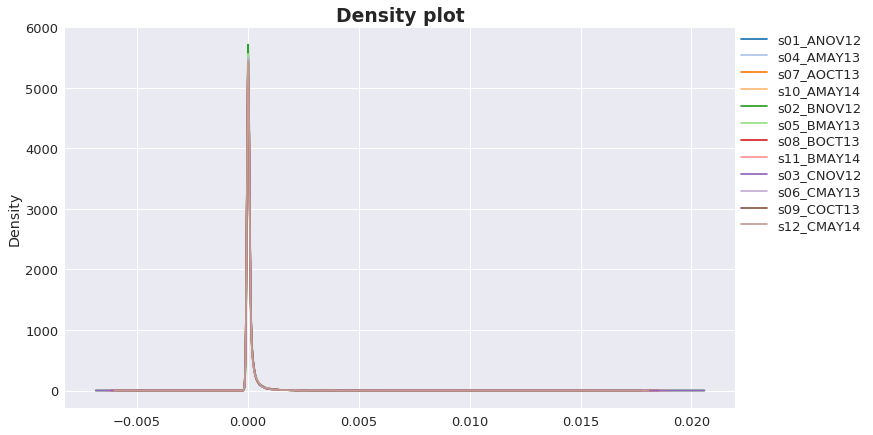

In [105]:
sns.set(font_scale=1.3)
ax1=pfams_norm.plot.density(color=colors_, figsize=(12,7))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines[:20], labels[:30], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.3)
#ax1.legend(lines[:20], labels[:30], bbox_to_anchor=(0.5, -0.05), loc='upper center', borderaxespad=2 ,labelspacing=0.3,
#          ncol=2, mode="expand", title='Sample')
plt.title("Density plot", weight='bold', size='large', loc='center')


### uv related pfams 

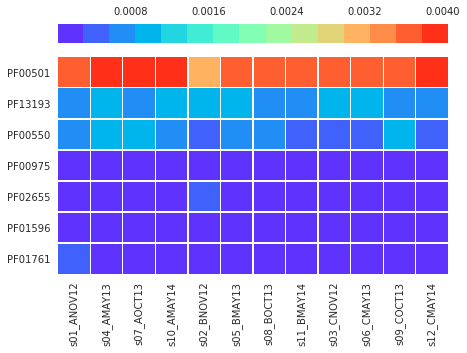

In [4]:
uv=pfams_norm.T[['PF00501',
                  'PF13193','PF00550','PF00975','PF02655','PF01596','PF01761']]
sns.set(font_scale=1)
fig = plt.figure(figsize=(7,5))
ax= sns.heatmap(uv.T, linewidths=0.3,
cmap=sns.color_palette("rainbow", 15), cbar_kws = dict(use_gridspec=False,location="top"))
plt.savefig("../figures/uvprotection.png", bbox_inches='tight',dpi=400) 



## Pfam Marker genes 

The following PFAMS were selected according to a previous benchmark using the module 2 of MEBS to discover marker genes. The analysis  will be described elsewhere 

In [5]:
markers=pfams_norm.T[[   #Oxygen
                    'PF00067', 'PF00115', 'PF01077', 'PF02560', 'PF03460', 'PF04898', 'PF13442',
                      #Mycosporine Biosynthesis UV Protection 
                    #'PF00501',
                  'PF13193','PF00550','PF00975','PF02655','PF01596','PF01761',
                    #Nitrogen 
                    'PF00174', 'PF00507', 'PF00547', 'PF00699', 
                    'PF02211','PF02633', 'PF05899', 'PF09347',
                    #Iron 
                    'PF14522', 'PF00033', 'PF00034','PF00355',
                    #Sulfur                 
                   'PF12139', 'PF00374','PF01747','PF02662','PF10418','PF13247','PF04358',
                    'PF01058','PF01568','PF09242','PF04879','PF08770',
                    #Sulfur high std     
                    'PF14306','PF03916','PF17179','PF13501','PF02665','PF14697',

                    #Methane
                    'PF01913', 'PF01993','PF02289','PF02741','PF04208' ,'PF04211','PF05440']]
markers.head()

,PF00067,PF00115,PF01077,PF02560,PF03460,PF04898,PF13442,PF13193,PF00550,PF00975,...,PF13501,PF02665,PF14697,PF01913,PF01993,PF02289,PF02741,PF04208,PF04211,PF05440
s01_ANOV12,0.000303,0.000777,0.000224,0.000010,0.000151,0.000224,0.000449,0.000772,0.000736,0.000110,...,0.000031,0.000094,0.000287,0.000026,0.000000,0.000037,0.000016,0.000010,0.0,0.0
s04_AMAY13,0.000634,0.000805,0.000285,0.000011,0.000228,0.000251,0.000452,0.000965,0.000961,0.000194,...,0.000042,0.000057,0.000141,0.000015,0.000000,0.000015,0.000008,0.000000,0.0,0.0
s07_AOCT13,0.000428,0.000697,0.000266,0.000011,0.000151,0.000302,0.000413,0.000848,0.000896,0.000136,...,0.000041,0.000052,0.000221,0.000018,0.000007,0.000015,0.000015,0.000004,0.0,0.0
s10_AMAY14,0.000351,0.000835,0.000246,0.000009,0.000182,0.000233,0.000383,0.001004,0.000698,0.000128,...,0.000018,0.000087,0.000287,0.000005,0.000009,0.000032,0.000009,0.000005,0.0,0.0
s02_BNOV12,0.000079,0.000416,0.000146,0.000000,0.000124,0.000281,0.000247,0.000887,0.000494,0.000079,...,0.000056,0.000022,0.000416,0.000022,0.000011,0.000011,0.000022,0.000011,0.0,0.0


## Marker genes according to MEBS

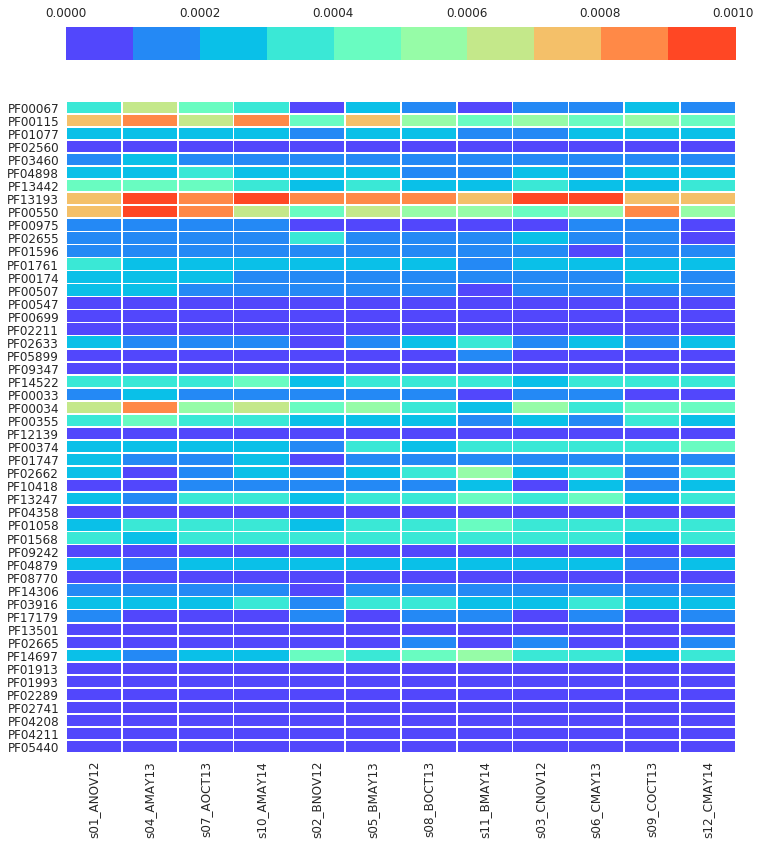

In [10]:
sns.set(font_scale=1.2)
fig = plt.figure(figsize=(12,15))
ax= sns.heatmap(markers.T, linewidths=0.6,
cmap=sns.color_palette("rainbow", 10), cbar_kws = dict(use_gridspec=False,location="top"))

plt.savefig("../figures/marker.genes.heatmap.png", bbox_inches='tight',dpi=400) 


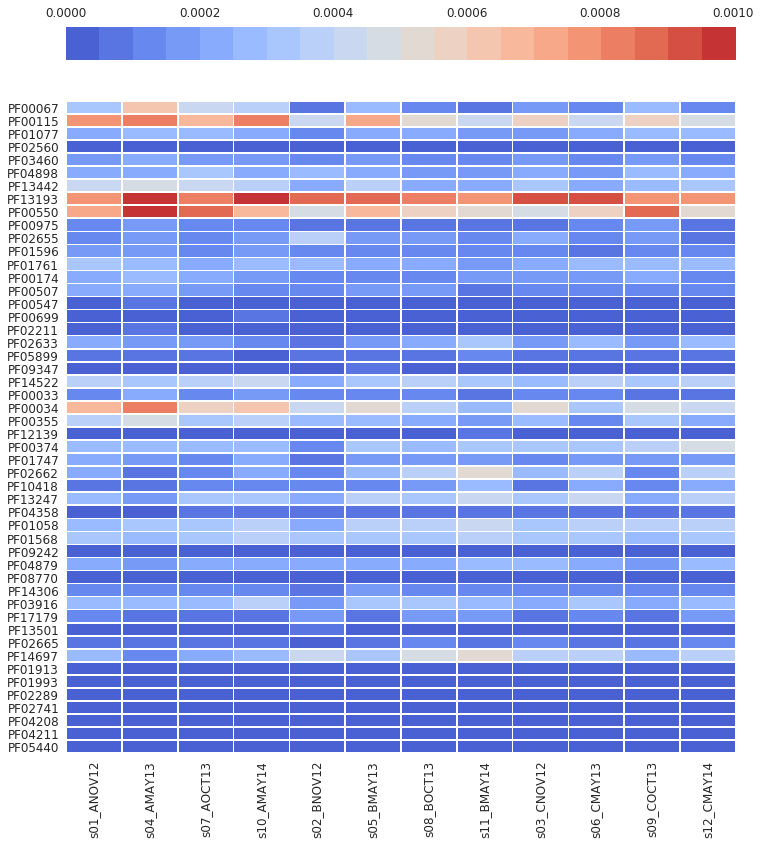

In [14]:
#old colors
sns.set(font_scale=1.2)
fig = plt.figure(figsize=(12,15))
ax= sns.heatmap(markers.T, linewidths=0.6,cmap=sns.color_palette("coolwarm", 20),cbar_kws = dict(use_gridspec=False,location="top"))
plt.savefig("../figures/marker.genes1.heatmap.png", bbox_inches='tight',dpi=400) 